# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

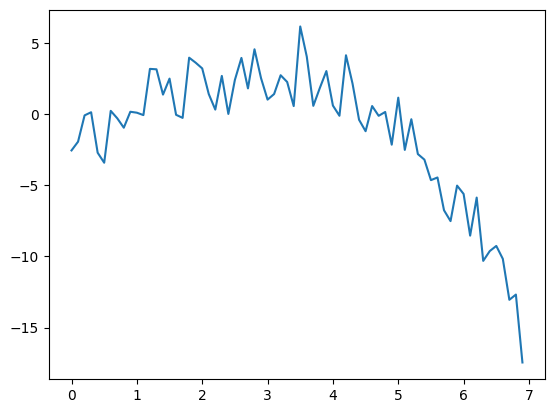

In [4]:
import matplotlib.pyplot as plt
# Your code for scatterplot here


x = xy_data[:,0]      # First column 
y = xy_data[:,1]  # Second column 

plt.plot(x, y)
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [64]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    dimensions = np.shape(data_matrix)
    N = dimensions[0]

    if k >= N:
        k = N - 1
    
    all_ones = np.ones(N)
    y_values = data_matrix[:,1]
    x_values = np.array(data_matrix[:,0])
    
    # Creating Matrix X
    X = np.ones((N,1))

    for i in range(1,k+1):
        # new_column = x_values**i
        X = np.hstack((X, (x_values**i).reshape(N, 1)))

    XT = X.T

    # Regression - Find Optiaml Solution
    beta_ployreg = np.linalg.inv(XT.dot(X)).dot(XT.dot(y_values))

    print('----Regression coefficients:-----')
    for i in range(k+1):
        print('Beta {}: {}'.format(i, beta_ployreg[i]))
    
    
    #Compute the residuals
    x_fit = X.dot(beta_ployreg) 
    resid_polyreg = y_values - x_fit



    return(beta_ployreg, x_fit, resid_polyreg)




Use the tests below to check the outputs of the function you have written:

In [65]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

----Regression coefficients:-----
Beta 0: 1.9999999999999971
Beta 1: -7.0
Beta 2: 3.000000000000005
----Regression coefficients:-----
Beta 0: 3.100000000000001
----Regression coefficients:-----
Beta 0: 3.100000000000001


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

----Regression coefficients:-----
Beta 0: -3.290016953645162
Beta 1: 4.814084904408114
Beta 2: -0.906550919466202
----Regression coefficients:-----
Beta 0: -1.9993320907193493
Beta 1: 2.485248689225955
Beta 2: -0.05667063220056434
Beta 3: -0.0821140374169751
----Regression coefficients:-----
Beta 0: -2.3366685948171773
Beta 1: 3.5308150481029803
Beta 2: -0.7500566573802628
Beta 3: 0.07494528687862755
Beta 4: -0.011381110456209109


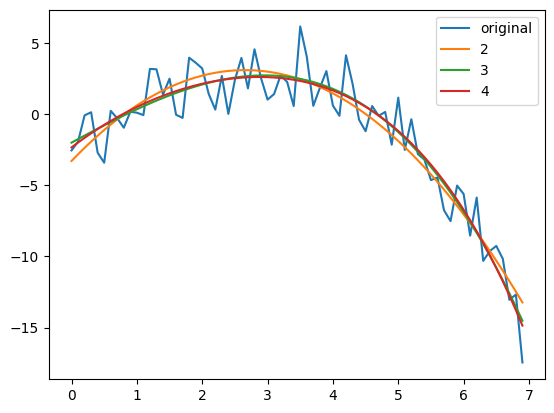

k=4
SSE=[172.181, 152.4058, 151.2278], R^2=[0.8876, 0.9005, 0.9013]


In [72]:
k_values = [2,3,4]
x_values = xy_data[:,0]
y_values = xy_data[:,1]
fit_0 = np.mean(y_values) * np.ones(np.shape(xy_data)[0])
SSE = []
R2 = []
Residue = []
SSE_0 = np.linalg.norm(y_values - fit_0)**2

plt.plot(x_values,y_values, label='original')

for k in k_values:

    beta, fit_poly, residue = polyreg(xy_data,k)
    SSE_k = np.linalg.norm(y_values - fit_poly)**2

    SSE.append(np.round(SSE_k, 4))
    R2.append(np.round(1- SSE_k/SSE_0, decimals = 4))
    Residue.append(np.round(residue,4))


    plt.plot(x_values, fit_poly, label='{}'.format(k))



plt.legend()
plt.show()
print("k={}".format(k))
print("SSE={}, R^2={}".format(SSE,R2))
 

Choose model of k=3 because comparing to k=4, it has a very similar SSE and $R^2$ value. This means the extra order of model added doesn't contribute very much to a better fit. Compared to k=2, SSE is much smaller and $R^2$ is much larger. 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

----Regression coefficients:-----
Beta 0: -1.9993320907193493
Beta 1: 2.485248689225955
Beta 2: -0.05667063220056434
Beta 3: -0.0821140374169751


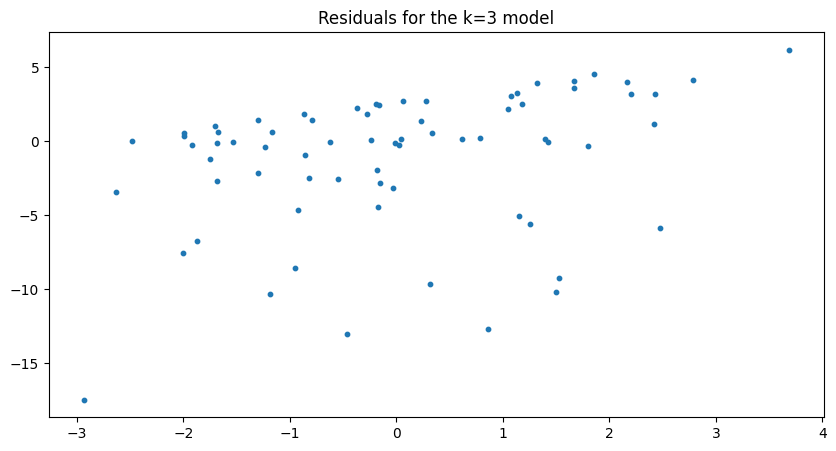

Mean of residuals for k=3 model =  0.0 Variance of residuals =  2.177


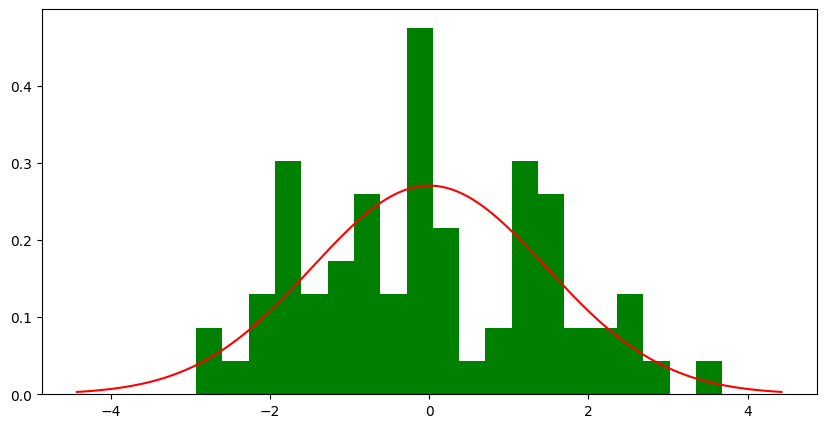

In [77]:
#Your code here
from scipy.stats import norm

beta, fit_poly, residue = polyreg(xy_data,3)

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(residue, y_values, s=10)
plt.title('Residuals for the k=3 model')
plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for k=3 model = ', np.round(np.mean(residue), 3), 
      'Variance of residuals = ', np.round(np.var(residue),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(residue, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(residue)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()
